In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = f"D:\HeartAttackAnalysis\heart_attack_analysis.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trestbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalach -- 91
exang -- 2
oldpeak -- 40
slope -- 3
ca -- 5
thal -- 4
target -- 2


In [7]:
categorical_list = ["sex", "cp","fbs","restecg","exang","slope","ca","thal","target"]

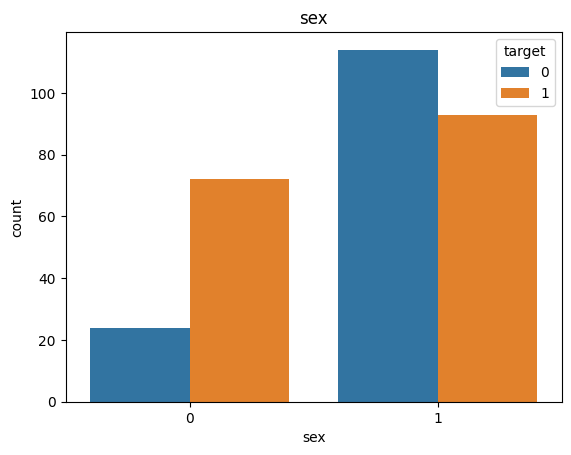

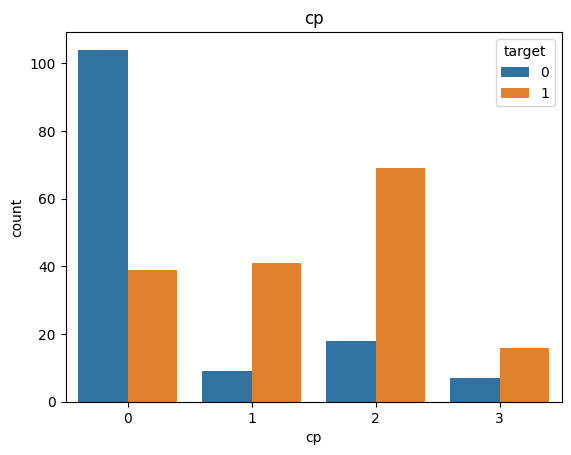

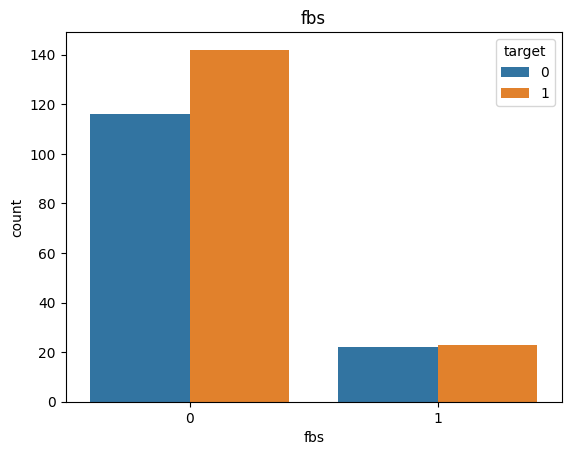

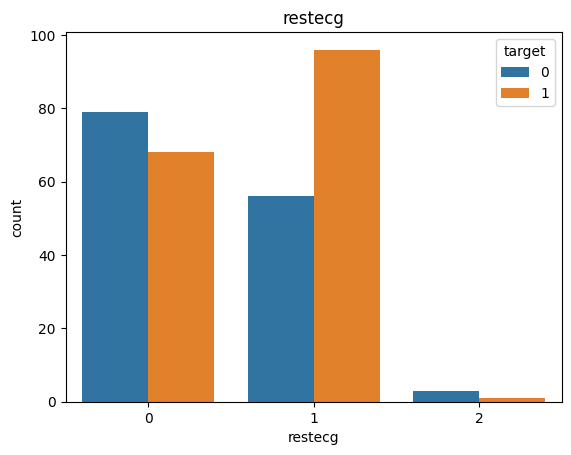

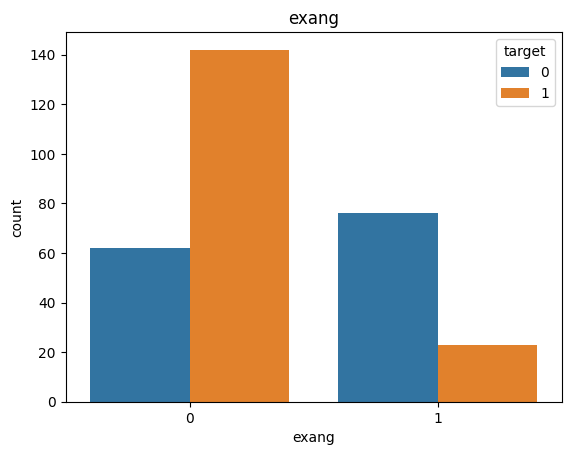

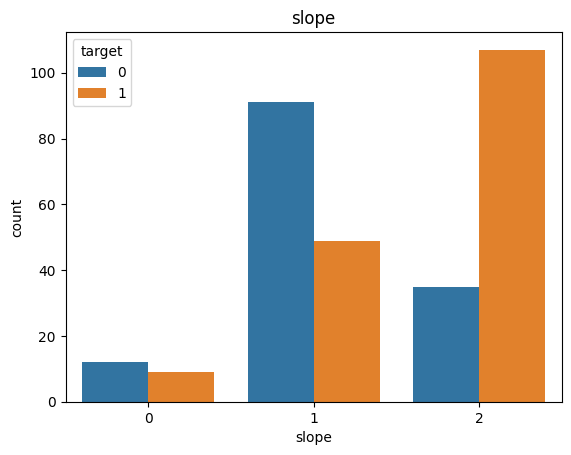

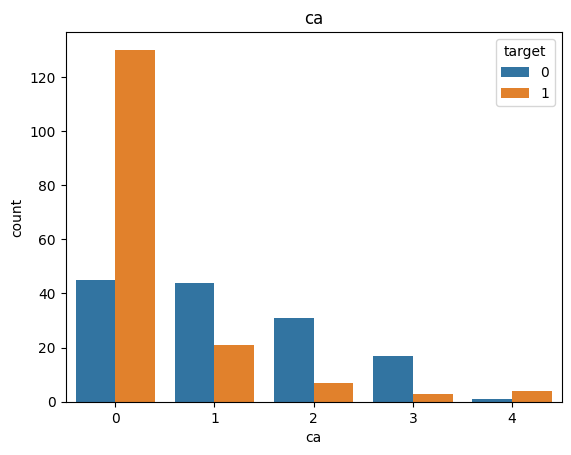

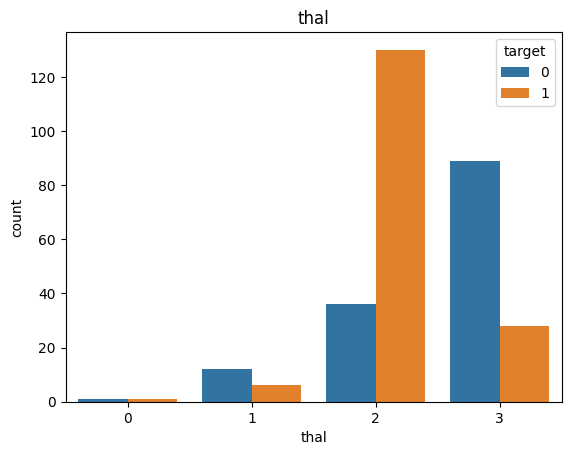

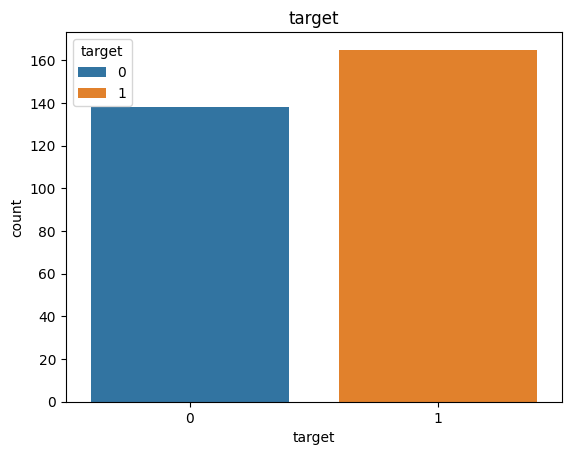

In [8]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i, data= df_categoric, hue= "target")
    plt.title(i)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
numerical_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

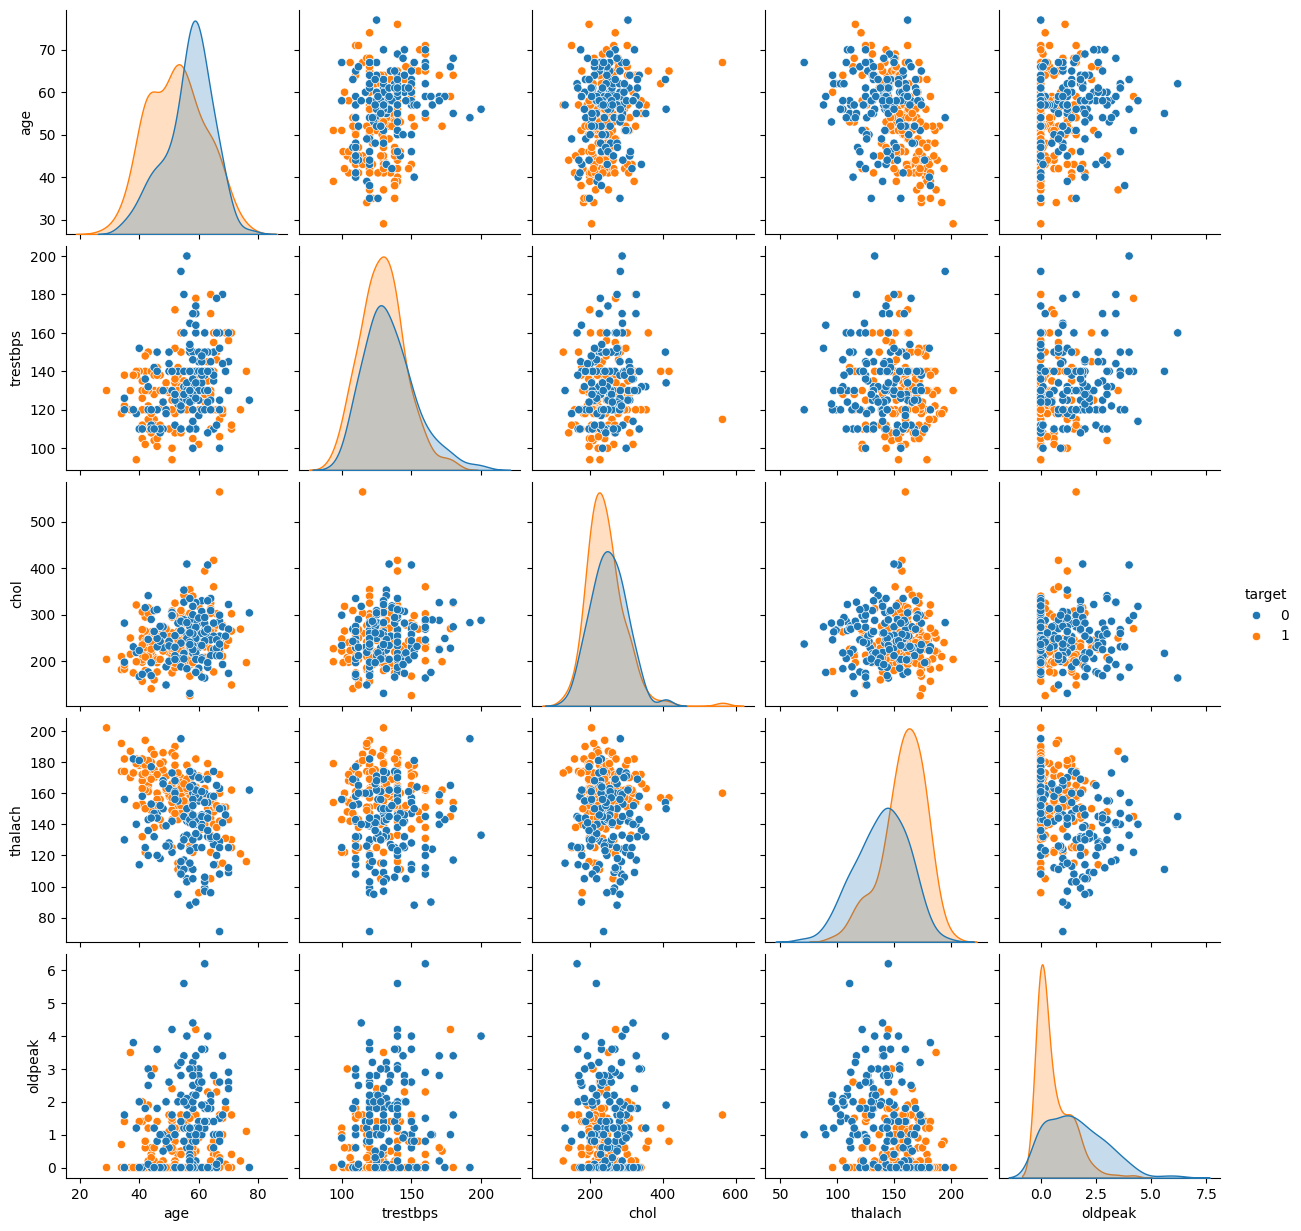

In [11]:
df_numeric = df.loc[:, numerical_list]
sns.pairplot(df_numeric, hue= "target", diag_kind="kde")
plt.show()

In [12]:
scaler = StandardScaler()
scaler

StandardScaler()

In [13]:
scaled_array = scaler.fit_transform(df[numerical_list[:-1]])

In [14]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]],
      shape=(303, 5))

In [15]:
df_dummy = pd.DataFrame(scaled_array, columns= numerical_list[:-1])
df_dummy.head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [16]:
df_dummy = pd.concat([df_dummy, df.loc[:, 'target']], axis= 1)
df_dummy.head()

,age,trestbps,chol,thalach,oldpeak,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [17]:
data_melted = pd.melt(df_dummy, id_vars="target", var_name= "features", value_name= "value")
data_melted.head(20)

,target,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


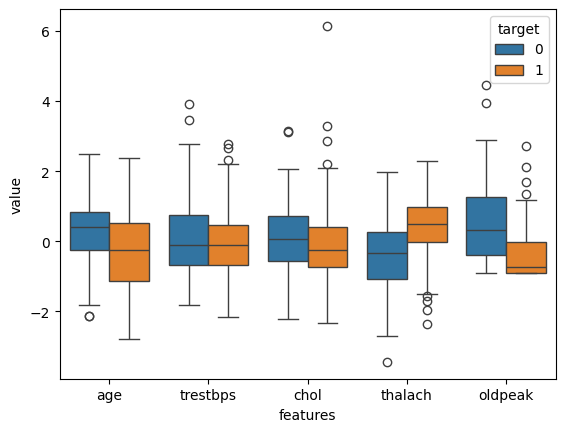

In [18]:
plt.figure()
sns.boxplot(x= 'features', y='value', hue= "target", data = data_melted)
plt.show()

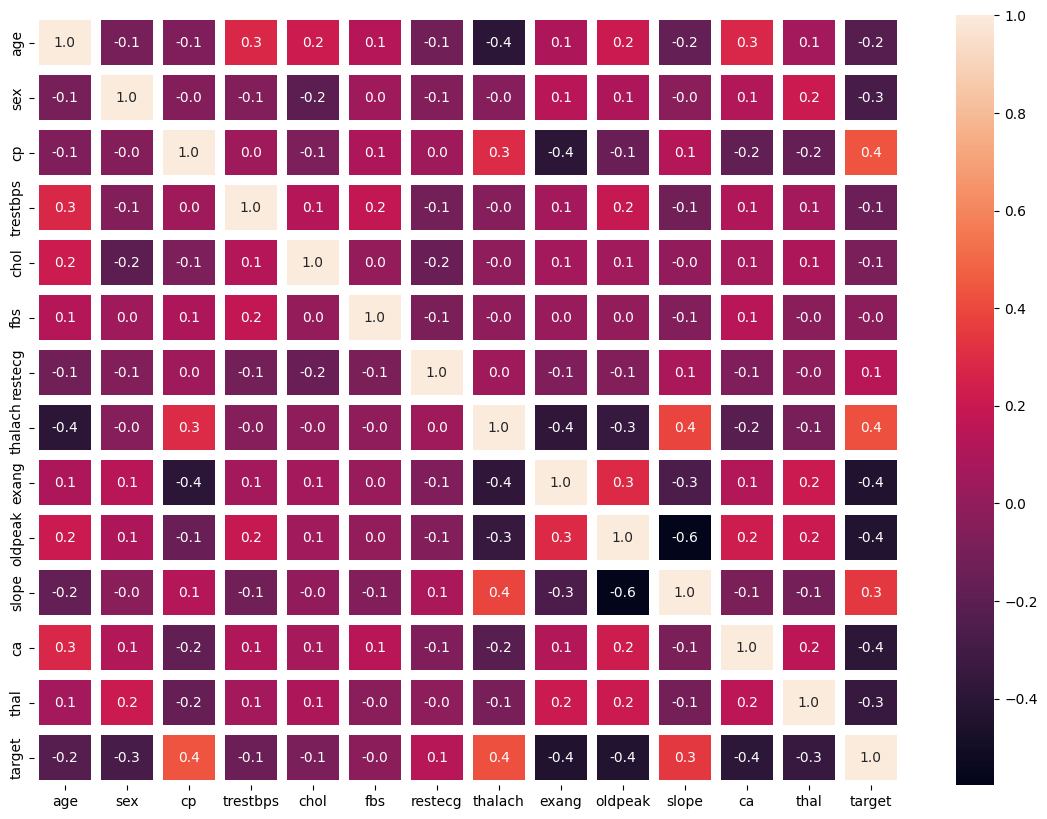

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot= True, fmt= ".1f", linewidths=7)
plt.show()

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


In [24]:
df1 = df.copy()

In [25]:
df1 = pd.get_dummies(df1, columns= categorical_list[:-1], drop_first= True)
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [26]:
X = df1.drop(["target"], axis = 1)
y = df1[['target']]


In [27]:
scaler = StandardScaler()
scaler

StandardScaler()

In [28]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


Running GridSearchCV for RandomForest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Running GridSearchCV for SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Running GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Running GridSearchCV for KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


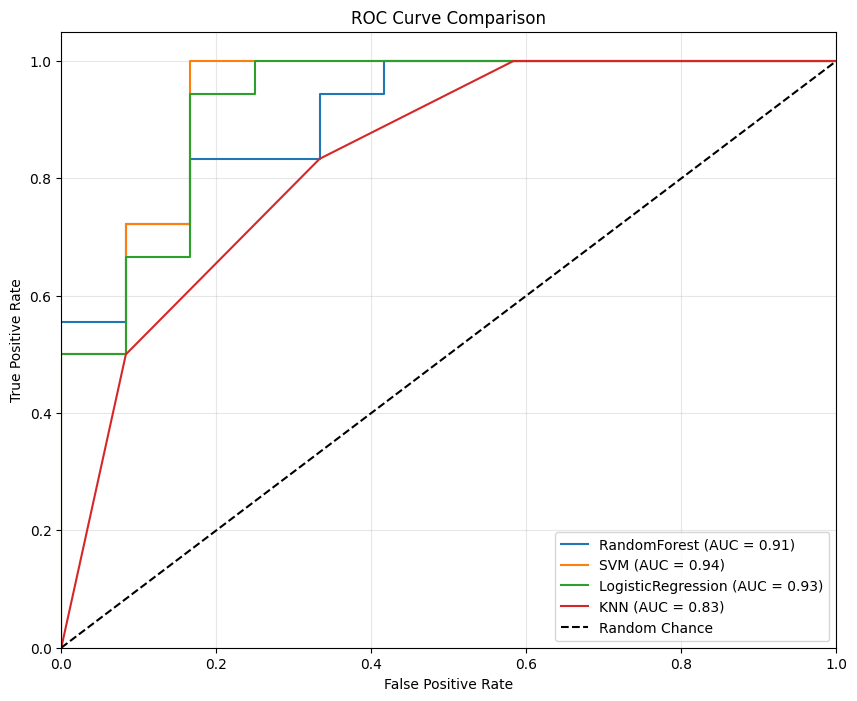


Best Model: RandomForest
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8025157232704403

Best Model: SVM
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.820754716981132

Best Model: LogisticRegression
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.8357092941998603

Best Model: KNN
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8172606568832983

Evaluating Best Model: LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.89      0.94      0.92        18

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Define models and their parameter grids
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}

# Dictionary to store results
best_models = {}

# Perform GridSearchCV for each model
for model_name, mp in models_and_parameters.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_model': grid_search.best_estimator_
    }

# Plot ROC curves
plt.figure(figsize=(10, 8))

for model_name, result in best_models.items():
    best_model = result['best_model']
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot configuration
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Print best models and their scores
for model_name, result in best_models.items():
    print(f"\nBest Model: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Accuracy: {result['best_score']}")

# Evaluate the best model on the test set
best_model_name = max(best_models, key=lambda k: best_models[k]['best_score'])
best_model = best_models[best_model_name]['best_model']

print(f"\nEvaluating Best Model: {best_model_name}")
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
